# Fly height correlation and prediction 
#### spindle division
@auther suraphop bunsawat  

## import and read file

In [1]:
#import tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
#load data from csv file
datasets = pd.read_csv('../fly_height/datasets/fly_height.csv',encoding='ansi')
print(f'datasets shape :{datasets.shape}')

datasets shape :(26611, 7)


## show data table

In [3]:
datasets.head()

,Date,Barcode,FlyHeight,Axial_Play,Oil_Top,Oil_Bottom,Max_force
0,01/11/2021,A2GAF100860536PCA3182K8A0PMPPP00AP0PP000000 ...,5.65,14.3,8.13,8.15,589.0
1,01/11/2021,A2GAQ100860536PCA3182K8A0PMPPP00AP0PP000000 ...,6.10,13.0,8.12,8.13,412.0
2,01/11/2021,A2GB1100860536PCA3182K8A0PMPPP00AP0PP000000 ...,5.50,14.3,8.12,8.13,378.0
3,01/11/2021,A2GBJ100860536PCA3182K8A0PMPPP00AP0PP000000 ...,6.13,13.4,8.09,8.14,471.0
4,01/11/2021,A2GC4100860536PCA3182K8A0PMPPP00AP0PP000000 ...,5.31,13.7,8.09,8.13,470.0


In [4]:
#statistic data
datasets.describe()

,FlyHeight,Axial_Play,Oil_Top,Oil_Bottom,Max_force
count,14030.000000,14030.000000,14030.000000,14030.000000,14030.000000
mean,5.991571,13.965754,8.128148,8.127262,517.153100
std,0.644333,0.570629,0.034083,0.027766,190.349728
min,3.750000,12.000000,8.040000,8.040000,126.000000
25%,5.540000,13.600000,8.100000,8.110000,404.000000
50%,6.035000,13.900000,8.130000,8.130000,454.000000
75%,6.440000,14.300000,8.150000,8.150000,555.750000
max,9.340000,16.000000,8.230000,8.190000,2217.000000


In [5]:
# info check
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26611 entries, 0 to 26610
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        14030 non-null  object 
 1   Barcode     14030 non-null  object 
 2   FlyHeight   14030 non-null  float64
 3   Axial_Play  14030 non-null  float64
 4   Oil_Top     14030 non-null  float64
 5   Oil_Bottom  14030 non-null  float64
 6   Max_force   14030 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


In [6]:
#check null
datasets.isnull().sum()

Date          12581
Barcode       12581
FlyHeight     12581
Axial_Play    12581
Oil_Top       12581
Oil_Bottom    12581
Max_force     12581
dtype: int64

In [7]:
#drop null
datasets = datasets.dropna()
datasets.isnull().sum()

Date          0
Barcode       0
FlyHeight     0
Axial_Play    0
Oil_Top       0
Oil_Bottom    0
Max_force     0
dtype: int64

## data visualization
 - density
 - pairplot
 - correlation

C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

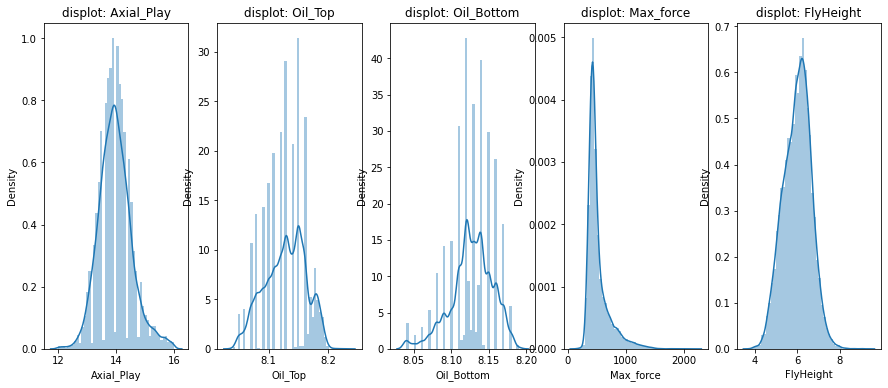

In [8]:
#plot density 
plt.figure(1,figsize=(15,6))
n=0
for x in ['Axial_Play','Oil_Top','Oil_Bottom','Max_force','FlyHeight']:
    n += 1
    plt.subplot(1,5,n)
    sns.distplot(datasets[x])
    plt.title(f'displot: {x}')


C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


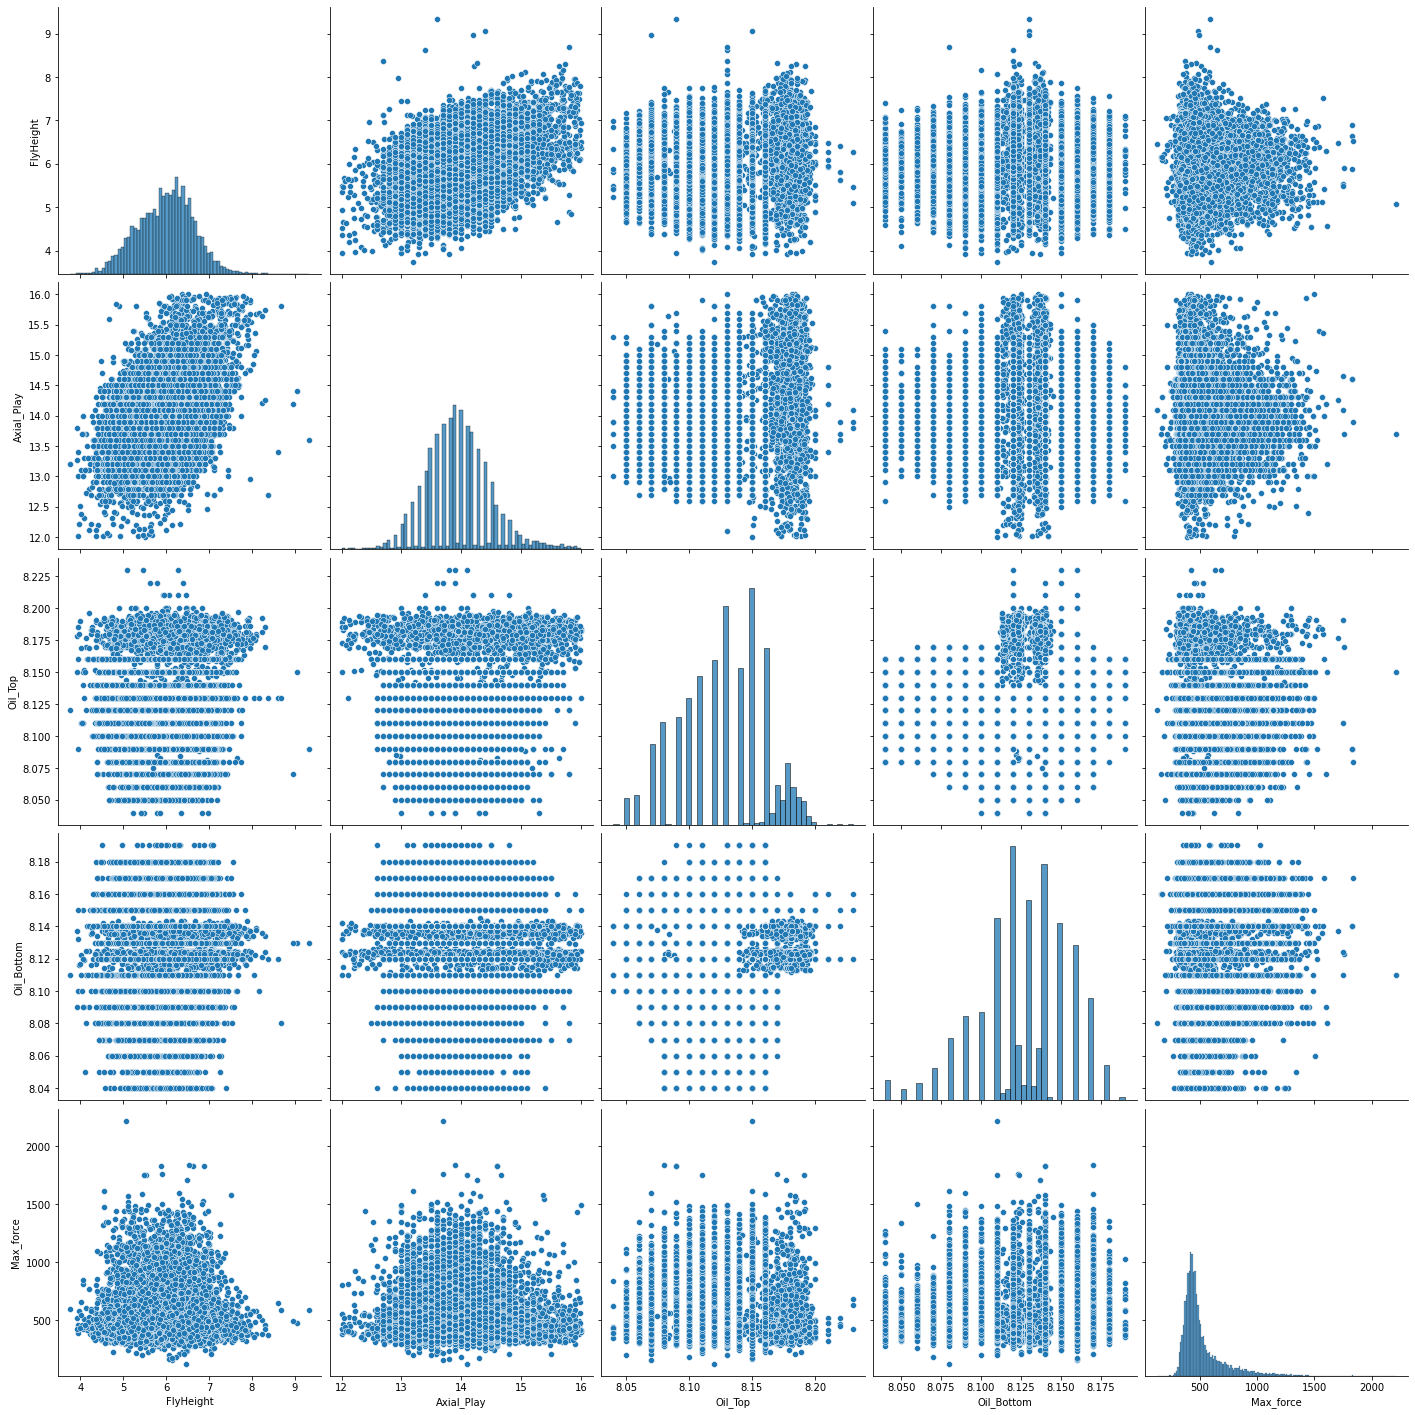

In [9]:
#pair plot
sns.pairplot(datasets,size = 4)

<AxesSubplot:>

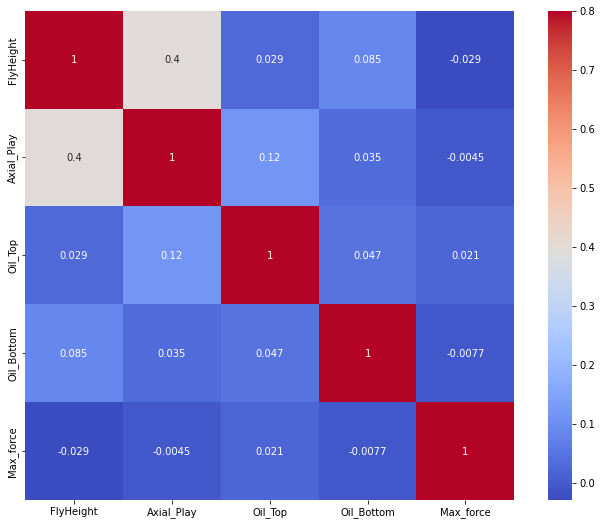

In [10]:
#correlation
datasets_corr = datasets.drop("Barcode",axis=1)

corrmat = datasets_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='coolwarm',annot=True)


## Regression models

### 4 attribute (Axial_Play,Oil_Top,Oil_Bottom,Max_force) model

In [11]:
# prepare datasets before training 

X = datasets.drop(['FlyHeight','Date','Barcode'],axis=1) # Independet variable
y = datasets['FlyHeight'] # dependent variable

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14030 entries, 0 to 14029
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Axial_Play  14030 non-null  float64
 1   Oil_Top     14030 non-null  float64
 2   Oil_Bottom  14030 non-null  float64
 3   Max_force   14030 non-null  float64
dtypes: float64(4)
memory usage: 548.0 KB


In [12]:
#split model
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


In [13]:
#check data X_train
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10522 entries, 8894 to 2732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Axial_Play  10522 non-null  float64
 1   Oil_Top     10522 non-null  float64
 2   Oil_Bottom  10522 non-null  float64
 3   Max_force   10522 non-null  float64
dtypes: float64(4)
memory usage: 411.0 KB


In [14]:
#check data X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 7053 to 11158
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Axial_Play  3508 non-null   float64
 1   Oil_Top     3508 non-null   float64
 2   Oil_Bottom  3508 non-null   float64
 3   Max_force   3508 non-null   float64
dtypes: float64(4)
memory usage: 137.0 KB


In [15]:
# create instance regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
#accuracy score
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(f'accuracy score : {round(lr.score(X_test,y_test)*100,2)} %')

accuracy score : 15.63 %


### only Axial Play model  

In [17]:
#prepare datasets
X = datasets['Axial_Play']
y = datasets['FlyHeight'] # dependent variable


In [18]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

print(f'count X_train :{X_train.shape}')
print(f'count X_test :{X_test.shape}')

count X_train :(10522,)
count X_test :(3508,)


In [19]:
#create instance and training
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1) ,y_train)

LinearRegression()

In [20]:
#accuracy score
y_train_pred = lr.predict(X_train.values.reshape(-1,1))
y_test_pred = lr.predict(X_test.values.reshape(-1,1))
print(f'accuracy score : {round(lr.score(X_test.values.reshape(-1,1),y_test)*100,2)} %')

accuracy score : 15.02 %


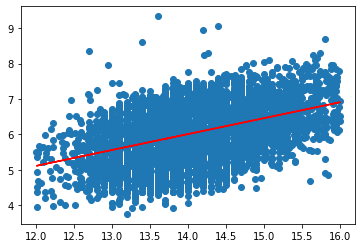

In [21]:
#plot data
plt.scatter(X,y)
plt.plot(X_test,y_test_pred,color="red")